
<div class="alert alert-info" role="alert">
  <p>
    <b>Usage Guidelines</b>
  </p>

  <p>
    This lesson is part of the <b>DS Lab core curriculum</b>. For that reason, this notebook can only be used on your WQU virtual machine.
  </p>

  <p>
    This means:
    <ul>
      <li><span style="color: red">ⓧ</span> No downloading this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing of this notebook with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No downloading the embedded videos in this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing embedded videos with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No adding this notebook to public or private repositories.</li>
      <li><span style="color: red">ⓧ</span> No uploading this notebook (or screenshots of it) to other websites, including websites for study resources.</li>
    </ul>

  </p>
</div>


<font size="+3"><strong>5.5. Bankruptcy in Taiwan 🇹🇼</strong></font>

In [1]:
import wqet_grader

wqet_grader.init("Project 5 Assessment")

In [2]:
# Import libraries here
import gzip
import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Prepare Data

## Import

**Task 5.5.1:** Load the contents of the `"data/taiwan-bankruptcy-data.json.gz"` and assign it to the variable <code>taiwan_data</code>. 

Note that <code>taiwan_data</code> should be a dictionary. You'll create a DataFrame in a later task.

In [3]:
with gzip.open("data/taiwan-bankruptcy-data.json.gz","r") as read_file:
    taiwan_data = json.load(read_file)
    
print(type(taiwan_data))

<class 'dict'>


In [4]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.1", taiwan_data["metadata"])

**Task 5.5.2:** Extract the key names from <code>taiwan_data</code> and assign them to the variable <code>taiwan_data_keys</code>.

<div class="alert alert-info" role="alert">
    <b>Tip:</b> The data in this assignment might be organized differently than the data from the project, so be sure to inspect it first. 
</div>

In [5]:
taiwan_data_keys = taiwan_data.keys()
print(taiwan_data_keys)

dict_keys(['schema', 'metadata', 'observations'])


In [7]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.2", list(taiwan_data_keys))

**Task 5.5.3:** Calculate how many companies are in `taiwan_data` and assign the result to `n_companies`. 

In [9]:
n_companies = len(taiwan_data["observations"])
print(n_companies)

6137


In [10]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.3", [n_companies])

**Task 5.5.4:** Calculate the number of features associated with each company and assign the result to `n_features`.

In [11]:
n_features = len(taiwan_data["observations"][0])
print(n_features)

97


In [14]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.4", [n_features])

**Task 5.5.5:** Create a `wrangle` function that takes as input the path of a compressed JSON file and returns the file's contents as a DataFrame. Be sure that the index of the DataFrame contains the ID of the companies. When your function is complete, use it to load the data into the DataFrame `df`.

In [16]:
# Create wrangle function
def wrangle(filename):
    with gzip.open(filename, "r") as f:
        data = json.load(f)
    df = pd.DataFrame().from_dict(data["observations"]).set_index("id")
    return df

In [17]:

df = wrangle("data/taiwan-bankruptcy-data.json.gz")
print("df shape:", df.shape)
df.head()

df shape: (6137, 96)


,bankrupt,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
id,,,,,,,,,,,,,,,,,,,,,
1,True,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,True,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,True,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,True,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,True,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [18]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.5", df)

## Explore

**Task 5.5.6:** Is there any missing data in the dataset? Create a Series where the index contains the name of the columns in `df` and the values are the number of <code>NaN</code>s in each column. Assign the result to <code>nans_by_col</code>. Neither the Series itself nor its index require a name. <span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

In [19]:
nans_by_col = df.isna().sum()
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (96,)


bankrupt    0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
dtype: int64

In [21]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.6", nans_by_col)

**Task 5.5.7:** Is the data imbalanced? Create a bar chart that shows the normalized value counts for the column `df["bankrupt"]`. Be sure to label your x-axis `"Bankrupt"`, your y-axis `"Frequency"`, and use the title `"Class Balance"`.

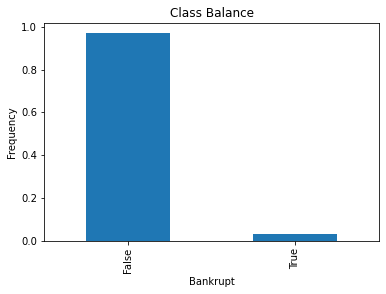

In [22]:
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Bankrupt",
    ylabel="Frequency",
    title="Class Balance"
);
# Don't delete the code below 👇
plt.savefig("images/5-5-7.png", dpi=150)


In [23]:
with open("images/5-5-7.png", "rb") as file:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.7", file)

## Split

**Task 5.5.8:** Create your feature matrix `X` and target vector `y`. Your target is `"bankrupt"`. 

In [24]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


In [25]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.8a", X)

In [27]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.8b", y)

**Task 5.5.9:** Divide your dataset into training and test sets using a randomized split. Your test set should be 20% of your data. Be sure to set `random_state` to `42`.

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_train.shape)
print("y_test shape:", y_train.shape)

X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (4909, 95)
y_test shape: (4909,)


In [29]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.9", list(X_train.shape))

## Resample

**Task 5.5.10:** Create a new feature matrix `X_train_over` and target vector `y_train_over` by performing random over-sampling on the training data. Be sure to set the `random_state` to `42`.

In [30]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


In [31]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.10", list(X_train_over.shape))

# Build Model

## Iterate

**Task 5.5.11:** Create a classifier <code>clf</code> that can be trained on `(X_train_over, y_train_over)`. You can use any of the predictors you've learned about in the Data Science Lab. 

In [32]:
clf =  RandomForestClassifier(random_state=42)

clf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [33]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.11", clf)

**Task 5.5.12:** Perform cross-validation with your classifier using the over-sampled training data, and assign your results to <code>cv_scores</code>. Be sure to set the <code>cv</code> argument to 5. 

<div class="alert alert-info" role="alert">
    <p><b>Tip:</b> Use your CV scores to evaluate different classifiers. Choose the one that gives you the best scores.</p>
</div>

In [34]:
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_scores)

[0.99316868 0.99474514 0.99369085 0.99369085 0.9957939 ]


In [35]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.12", list(cv_scores))

**Ungraded Task:** Create a dictionary <code>params</code> with the range of hyperparameters that you want to evaluate for your classifier. If you're not sure which hyperparameters to tune, check the [scikit-learn](https://scikit-learn.org/stable/) documentation for your predictor for ideas.

<div class="alert alert-info" role="alert">
<p><b>Tip:</b> If the classifier you built is a predictor only (not a pipeline with multiple steps), you don't need to include the step name in the keys of your <code>params</code> dictionary. For example, if your classifier was only a random forest (not a pipeline containing a random forest), your would access the number of estimators using <code>"n_estimators"</code>, not <code>"randomforestclassifier__n_estimators"</code>.</p>
</div>

In [36]:
params = {
    "n_estimators": range(20, 31, 5),
     "max_depth":range(2,5)
}
params

{'n_estimators': range(20, 31, 5), 'max_depth': range(2, 5)}

**Task 5.5.13:** Create a <code>GridSearchCV</code> named `model` that includes your classifier and hyperparameter grid. Be sure to set `cv` to 5, `n_jobs` to -1, and `verbose` to 1. 

In [37]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'n_estimators': range(20, 31, 5)},
             verbose=1)

In [38]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.13", model)

**Ungraded Task:** Fit your model to the over-sampled training data. 

In [39]:
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'n_estimators': range(20, 31, 5)},
             verbose=1)

**Task 5.5.14:** Extract the cross-validation results from your model, and load them into a DataFrame named <code>cv_results</code>. Looking at the results, which set of hyperparameters led to the best performance?

In [40]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.389755,0.023912,0.019681,0.024101,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.867052,0.869154,0.861725,0.860147,0.859621,0.863540,0.003847,7
1,0.501042,0.004187,0.033648,0.030318,2,25,"{'max_depth': 2, 'n_estimators': 25}",0.865476,0.867578,0.853312,0.860147,0.857518,0.860806,0.005197,8
2,0.602144,0.006754,0.022237,0.024852,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.858644,0.864950,0.837014,0.854364,0.846477,0.852290,0.009717,9
3,0.551558,0.033043,0.008293,0.000270,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.893852,0.889648,0.894322,0.885910,0.892744,0.891295,0.003147,6
4,0.647836,0.026560,0.046076,0.029723,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.895954,0.887020,0.894322,0.893796,0.888538,0.891926,0.003493,5


In [41]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.14", cv_results)

**Task 5.5.15:** Extract the best hyperparameters from your model and assign them to <code>best_params</code>. 

In [42]:
best_params = model.best_params_


print(best_params)

{'max_depth': 4, 'n_estimators': 30}


In [43]:
wqet_grader.grade(
    "Project 5 Assessment", "Task 5.5.15", [isinstance(best_params, dict)]
)

## Evaluate

**Ungraded Task:** Test the quality of your model by calculating accuracy scores for the training and test data.

In [44]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9294
Test Accuracy: 0.8974


**Task 5.5.16:** Plot a confusion matrix that shows how your model performed on your test set.

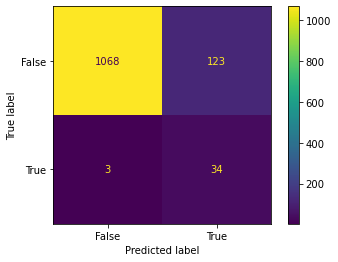

In [45]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);
# Don't delete the code below 👇
plt.savefig("images/5-5-16.png", dpi=150)


In [46]:
with open("images/5-5-16.png", "rb") as file:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.16", file)

**Task 5.5.17:** Generate a classification report for your model's performance on the test data and assign it to `class_report`.

In [47]:
class_report = classification_report(y_test,model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       1.00      0.90      0.94      1191
        True       0.22      0.92      0.35        37

    accuracy                           0.90      1228
   macro avg       0.61      0.91      0.65      1228
weighted avg       0.97      0.90      0.93      1228



In [48]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.17", class_report)

# Communicate

**Task 5.5.18:** Create a horizontal bar chart with the 10 most important features for your model. Be sure to label the x-axis `"Gini Importance"`, the y-axis `"Feature"`, and use the title `"Feature Importance"`.

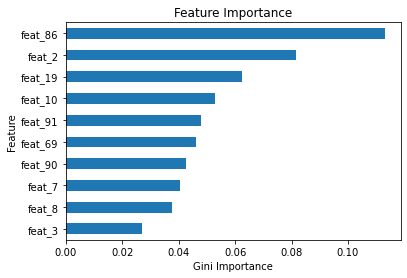

In [49]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
# Don't delete the code below 👇
plt.savefig("images/5-5-17.png", dpi=150)


In [50]:
with open("images/5-5-17.png", "rb") as file:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.18", file)

**Task 5.5.19:** Save your best-performing model to a a file named <code>"model-5-5.pkl"</code>.

In [51]:
# Save model
with open("model-5-5.pkl", "wb") as f:
    pickle.dump(model, f)

In [52]:

with open("model-5-5.pkl", "rb") as f:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.19", pickle.load(f))

**Task 5.5.20:** Open the file <code>my_predictor_assignment.py</code>. Add your `wrangle` function, and then create a `make_predictions` function that takes two arguments: `data_filepath` and <code>model_filepath</code>. Use the cell below to test your module. When you're satisfied with the result, submit it to the grader. 

In [75]:
%%bash
cat my_predictor_assignment.py

# Import libraries
import gzip
import json
import pickle

import pandas as pd


# Add wrangle function from lesson 5.4
# Wrangle function
def wrangle(filename):
    
    with gzip.open(filename, "r") as f:
        data = json.load(f)
    df = pd.DataFrame().from_dict(data["data"]).set_index("company_id")
    
    return df

# Add make_predictions function from lesson 5.3
def make_predictions(data_filepath, model_filepath):
   
    X_test = wrangle(data_filepath)
    with open(model_filepath, "rb") as f:
        loaded_model = pickle.load(f)
    y_test_pred = model.predict(X_test)
    y_test_pred=pd.Series(y_test_pred,index=X_test.index,name="bankrupt")
    return y_test_pred

In [80]:
# Import your module
from my_predictor_assignment import make_predictions
# Generate predictions
y_test_pred = make_predictions( 
    data_filepath="data/taiwan-bankruptcy-data-test-features.json.gz",
    model_filepath="model-5-5.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

KeyError: 'data'

<div class="alert alert-info" role="alert">
    <b>Tip:</b> If you get an <code style="color:#E45E5C;background-color:#FEDDDE">ImportError</code> when you try to import <code>make_predictions</code> from <code>my_predictor_assignment</code>, try restarting your kernel. Go to the <b>Kernel</b> menu and click on  <b>Restart Kernel and Clear All Outputs</b>. Then rerun just the cell above. ☝️
</div>

In [73]:
wqet_grader.grade(
    "Project 5 Assessment",
    "Task 5.5.20",
    make_predictions(
        data_filepath="data/taiwan-bankruptcy-data-test-features.json.gz",
        model_filepath="model-5-5.pkl",
    ),
)

KeyError: 'data'

---
Copyright 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
